# IMPORTING MODULES

# Load the data

In [1]:
import brainsurf.data.csv as csv_import
file_path = 'brainsurf/data/samples/adarsh/adarsh_pre.csv'
eeg_data = csv_import.convert_csv_to_eegdata(file_path)

In [2]:
length = len(eeg_data)
print(length)

100424


In [3]:
column_names = eeg_data.keys()
print(column_names)

Index(['sec', 'raw'], dtype='object')


In [4]:
summary = eeg_data.summary(10)

     sec      raw
0  0.000 -16.5344
1  0.005 -23.7305
2  0.010 -24.6399
3  0.015 -22.2412
4  0.020 -19.9524
5  0.025 -18.4143
6  0.030 -20.9778
7  0.035 -20.2393
8  0.040 -21.4050
9  0.045 -21.0022


In [5]:
eeg_data.extract_frequency_bands()

In [6]:
summary = eeg_data.summary(10)

     sec      raw     alpha      beta       delta     theta     gamma
0  0.000 -16.5344  0.739153  0.340532   49.747628  4.116308  0.040695
1  0.005 -23.7305  1.676459  0.749908   42.575573  3.634073  0.038842
2  0.010 -24.6399  3.382342  2.419534  135.210048  3.892357  0.125695
3  0.015 -22.2412  1.434365  1.619343   84.618161  3.953389  0.087822
4  0.020 -19.9524  4.340995  6.558143   78.591010  5.409474  0.729613
5  0.025 -18.4143  0.908967  0.688162   34.664515  1.957621  0.036741
6  0.030 -20.9778  1.791933  1.296061   83.958023  3.180223  0.098377
7  0.035 -20.2393  1.976249  1.150905   34.516828  2.102519  0.058791
8  0.040 -21.4050  0.469199  0.218817   29.096778  1.206942  0.010982
9  0.045 -21.0022  0.614998  0.385991   70.191149  3.794692  0.018610


In [7]:
import brainsurf.data.edf as edf_import
egf_eeg_data = edf_import.convert_edf_to_eegdata('brainsurf\data\samples\sample_data.edf')
egf_eeg_data.summary(5)

  channel_names                                           raw_data
0       EEG Fp1  [-6.347912214236662, -5.884709218585484, -5.16...
1       EEG Fp2  [-6.719954005188079, -6.252686981002529, -5.50...
2        EEG F3  [-5.6178915175097295, -5.75924680704967, -5.68...
3        EEG F4  [-4.054461545433731, -4.4169801989776385, -4.7...
4        EEG F7  [-5.759875172350652, -5.196062582894636, -4.36...


In [8]:
import brainsurf.data.xlsx as xlsx_import
egf_eeg_data = xlsx_import.convert_xlsx_to_eegdata('brainsurf\data\samples\sample_data.xlsx')
egf_eeg_data.summary(5)

     sec      raw
0  2.440 -9.51538
1  2.445 -8.83179
2  2.450 -7.40356
3  2.455 -7.04956
4  2.460 -7.83081


In [9]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

# Preprocessing

## Filtering

### Bandpass Filter

In [10]:
values = eeg_data['sec']
print(values)

0           0.000
1           0.005
2           0.010
3           0.015
4           0.020
           ...   
100419    194.305
100420    194.310
100421    194.315
100422    194.320
100423    194.325
Name: sec, Length: 100424, dtype: float64


In [11]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(eeg_data['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

200.00000000008976


[ -1.50562524  -8.14741752 -18.92222429 ...          nan          nan
          nan]


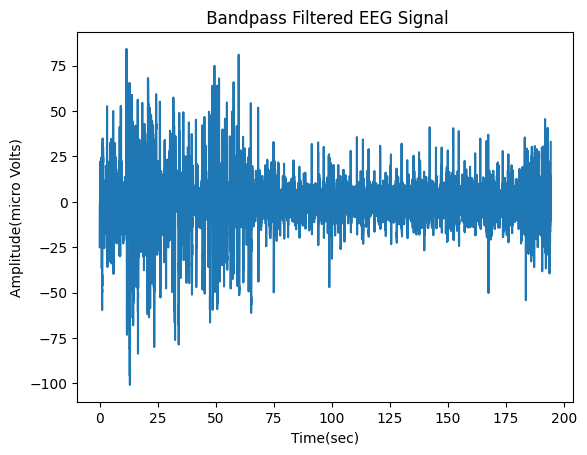

In [12]:
import brainsurf.visualization.plot_eeg_signal as plt
import brainsurf.preprocessing.filtering as filter

bandpass_filtered_eeg = filter.butter_bandpass_filter(eeg_data['raw'], lowcut, highcut, sampling_freq, order) 
print(bandpass_filtered_eeg)
plt.plot_eeg_signal(eeg_data['sec'], bandpass_filtered_eeg, ' Bandpass Filtered EEG Signal','Time(sec)','Amplitude(micro Volts)')

# Feature Extraction

In [13]:
import brainsurf.analysis.stats_analysis as stats

## Time-Domain Features

### Mean

In [14]:
csv_mean=stats.calculate_mean(bandpass_filtered_eeg)
print(csv_mean)

-0.005010748303499806


### Varience

In [15]:
csv_varience=stats.calculate_variance(bandpass_filtered_eeg)
print(csv_varience)

192.4765576638541


### Skewness 

In [16]:
csv_skewness= stats.calculate_skewness(bandpass_filtered_eeg)
print(csv_skewness)

nan


### Kurtosis 

In [17]:
csv_kurtosis =stats.calculate_kurtosis(bandpass_filtered_eeg)
print(csv_kurtosis)

nan


## Frequency-Domain Features

## Power spectral density

In [18]:
import brainsurf.visualization as vis
import brainsurf.analysis.power_spectrum as psd

freqs, psd = psd.psd_welch(bandpass_filtered_eeg[0], sampling_freq)
print(bandpass_filtered_eeg)

TypeError: object of type 'numpy.float64' has no len()

## Multi_fractal_spectrum

In [ ]:
import numpy as np
from scipy.stats import linregress

def calculate_multi_fractal_spectrum(eeg_data, q_values):
    """
    Calculates the multi-fractal spectrum for EEG data.

    Args:
        eeg_data (numpy.ndarray): EEG data array of shape (channels, samples).
        q_values (list): List of q values for which to calculate the spectrum.

    Returns:
        numpy.ndarray: Multi-fractal spectrum array of shape (2, len(q_values)),
                       where the first row corresponds to f(alpha) and the second
                       row corresponds to D(q).
    """
    # Calculate the wavelet leaders for each channel
    wavelet_leaders = []
    for channel in eeg_data:
        wavelet_coefficients = np.abs(np.fft.fft(channel)) ** 2
        wavelet_leaders.append(np.cumsum(wavelet_coefficients[::-1])[::-1])

    wavelet_leaders = np.array(wavelet_leaders)

    # Calculate the q-th order moments
    moments = []
    for q in q_values:
        moments.append(np.mean(wavelet_leaders ** q, axis=0))

    moments = np.array(moments)

    # Calculate the singularity spectrum
    f_alpha = []
    D_q = []
    for moment in moments:
        x = np.log(np.arange(1, len(moment)+1))
        # alpha, _, _, _, _ = linregress(x, np.log(moment))
        alpha, _, _, _, _ = linregress(np.log(np.arange(1, len(moment) + 1)), np.log(moment))

        f_alpha.append(alpha)
        D_q.append(alpha / (q_values - 1))

    spectrum = np.array([f_alpha, D_q])

    return spectrum

# Example usage:
eeg_data = np.random.rand(20, 1000)  # generate random EEG data of 20 channels and 1000 samples
q_values = np.arange(-5, 6)  # specify the q values for which to calculate the spectrum
spectrum = calculate_multi_fractal_spectrum(eeg.to_numpy().T, q_values)
print(spectrum)


[[0.04729741412735561 0.037837931301884495 0.02837844847641336
  0.018918965650942247 0.009459482825471124 0.0 -0.009459482825471122
  -0.01891896565094225 -0.028378448476413375 -0.03783793130188449
  -0.04729741412735562]
 [array([-0.0078829 , -0.00945948, -0.01182435, -0.0157658 , -0.02364871,
         -0.04729741,         inf,  0.04729741,  0.02364871,  0.0157658 ,
          0.01182435])
  array([-0.00630632, -0.00756759, -0.00945948, -0.01261264, -0.01891897,
         -0.03783793,         inf,  0.03783793,  0.01891897,  0.01261264,
          0.00945948])
  array([-0.00472974, -0.00567569, -0.00709461, -0.00945948, -0.01418922,
         -0.02837845,         inf,  0.02837845,  0.01418922,  0.00945948,
          0.00709461])
  array([-0.00315316, -0.00378379, -0.00472974, -0.00630632, -0.00945948,
         -0.01891897,         inf,  0.01891897,  0.00945948,  0.00630632,
          0.00472974])
  array([-0.00157658, -0.0018919 , -0.00236487, -0.00315316, -0.00472974,
         -0.0094594

C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:40: RuntimeWarning: divide by zero encountered in true_divide
  D_q.append(alpha / (q_values - 1))
C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:40: RuntimeWarning: invalid value encountered in true_divide
  D_q.append(alpha / (q_values - 1))
C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spectrum = np.array([f_alpha, D_q])


ValueError: setting an array element with a sequence.

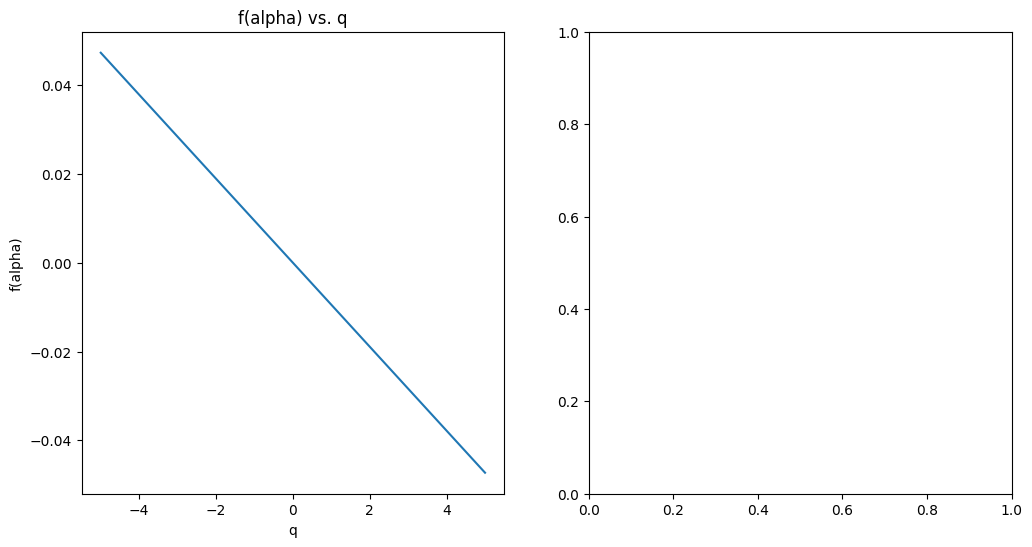

In [ ]:
# Extract f(alpha) and D(q)
import matplotlib.pyplot as plt
f_alpha = spectrum[0]
D_q = spectrum[1]

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(q_values, f_alpha)
plt.xlabel('q')
plt.ylabel('f(alpha)')
plt.title('f(alpha) vs. q')

plt.subplot(122)
plt.plot(q_values, D_q)
plt.xlabel('q')
plt.ylabel('D(q)')
plt.title('D(q) vs. q')

plt.tight_layout()
plt.show()

# Use the Inhouse Class

In [ ]:
from brainsurf.data.eeg_data import EEGDataFactory
factory = EEGDataFactory()
data = factory.create_eeg_data(input_file='brainsurf\data\samples\sample_data.csv')
data_summary = data.summary(300)
keys = data.keys()
print(keys)

# Graphs

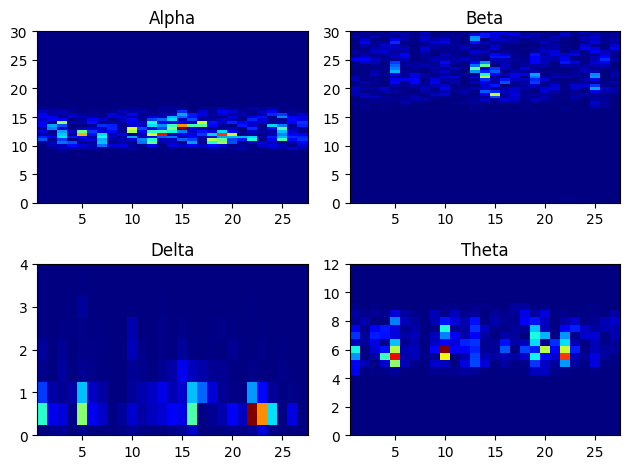

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


# Define the sampling frequency and time vector
fs = 250  # Hz
t = data["sec"].values

# Get the EEG data for each frequency band
alpha = data["alpha"].values
beta = data["beta"].values
delta = data["delta"].values
theta = data["theta"].values

# Define the frequency ranges for the spectrogram
f_alpha = [8, 12]
f_beta = [12, 30]
f_delta = [0.5, 4]
f_theta = [4, 8]

# Define the window size and overlap for the spectrogram
win = fs * 2  # 2 seconds
overlap = fs  # 1 second

# Generate the spectrogram for each frequency band
f, t_spec, S_alpha = signal.spectrogram(alpha, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_beta = signal.spectrogram(beta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_delta = signal.spectrogram(delta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_theta = signal.spectrogram(theta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)

# Plot the spectrograms
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].pcolormesh(t_spec, f, S_alpha, cmap="jet")
ax[0, 0].set_title("Alpha")
ax[0, 0].set_ylim([0, 30])
ax[0, 1].pcolormesh(t_spec, f, S_beta, cmap="jet")
ax[0, 1].set_title("Beta")
ax[0, 1].set_ylim([0, 30])
ax[1, 0].pcolormesh(t_spec, f, S_delta, cmap="jet")
ax[1, 0].set_title("Delta")
ax[1, 0].set_ylim([0, 4])
ax[1, 1].pcolormesh(t_spec, f, S_theta, cmap="jet")
ax[1, 1].set_title("Theta")
ax[1, 1].set_ylim([0, 12])
fig.tight_layout()
plt.show()


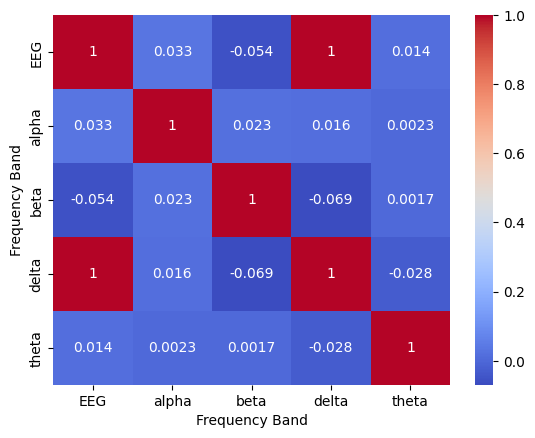

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = data.drop("sec", axis=1)
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.xlabel("Frequency Band")
plt.ylabel("Frequency Band")
plt.show()

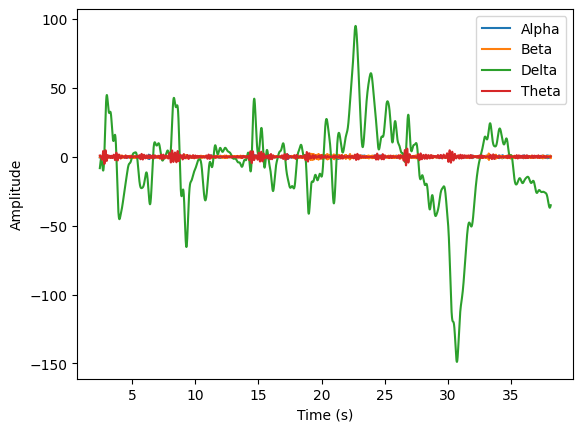

In [ ]:
# Line plot: A line plot can be used to visualize the amplitude of each frequency band over time.
#  This can help to identify any patterns or trends in the data.
import matplotlib.pyplot as plt

plt.plot(data['sec'], data['alpha'], label='Alpha')
plt.plot(data['sec'], data['beta'], label='Beta')
plt.plot(data['sec'], data['delta'], label='Delta')
plt.plot(data['sec'], data['theta'], label='Theta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Box plot: A box plot can be used to compare the distribution of amplitudes across the different frequency bands. This can help to identify any differences or similarities between the frequency bands.

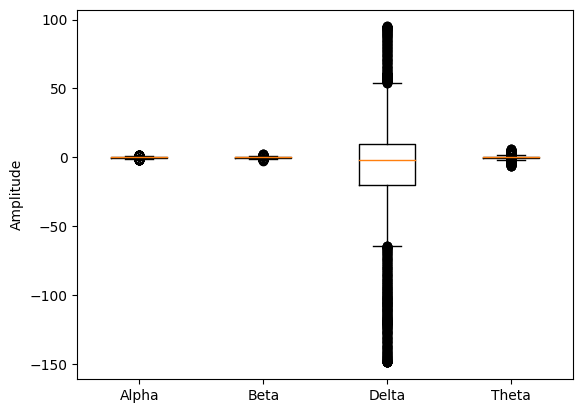

In [ ]:
data = [data['alpha'], data['beta'], data['delta'], data['theta']]
plt.boxplot(data, labels=['Alpha', 'Beta', 'Delta', 'Theta'])
plt.ylabel('Amplitude')
plt.show()

In [ ]:
#Filter using Notch filter
# notch_filtered_data = filter.notch_filter(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq, 50, q)
# notch_filtered_data=notch_filtered_data.ravel()
# plot_eeg.plot_eeg_signal(time, notch_filtered_data, 'Notch Filtered EEG Signal(1-50Hz)','Time(sec)','Amplitude(micro Volts)')

In [ ]:
# calculate relative power of alpha, beta, and theta bands
delta_power, theta_power , alpha_power, beta_power= stats.calculate_relative_power(freqs, psd)

In [ ]:
# print('Relative Power - Alpha: ', alpha_power)
# print('Relative Power - Beta: ', beta_power)
# print('Relative Power - Theta: ', theta_power)
# print('Relative Power - Delta: ', delta_power)

In [ ]:
notch_filtered_data

array([ -9.27256923,  -8.60642289,  -7.68786764, ..., -34.08919772,
       -34.62875288, -34.63432755])

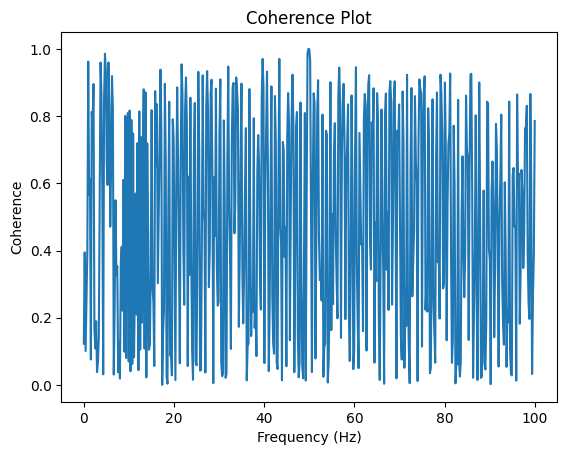

In [ ]:
coherence, freqs =  stats.calculate_coherence(data['alpha'].to_numpy().T , data['theta'].to_numpy().T, sampling_freq )
# print('Coherence - Alpha/Theta: ', coherence)
plot_eeg.plot_eeg_signal(coherence, freqs, 'Coherence Plot','Frequency (Hz)','Coherence')

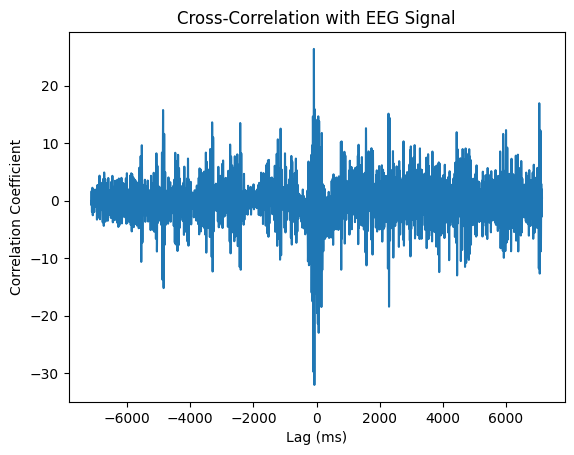

In [ ]:
# calculate coherence between alpha and theta bands
lags, xcorr_alpha = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
_, xcorr_beta = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
import matplotlib.pyplot as plt
# plot the cross-correlation functions
# plt.plot(lags, xcorr_alpha, label='Alpha')
# plt.plot(lags, xcorr_beta, label='Beta')
plot_eeg.plot_eeg_signal(xcorr_alpha,lags, 'Cross-Correlation with EEG Signal','Lag (ms)','Correlation Coefficient')

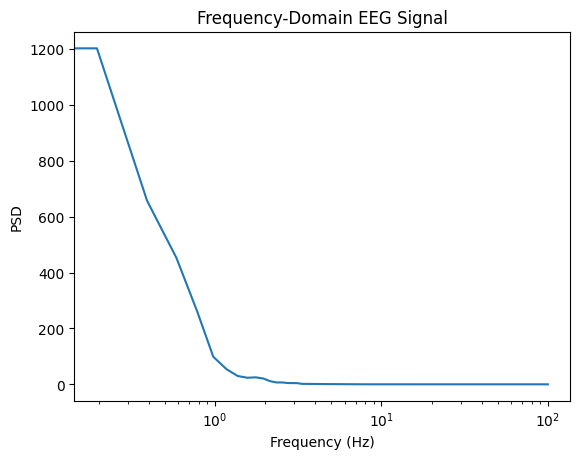

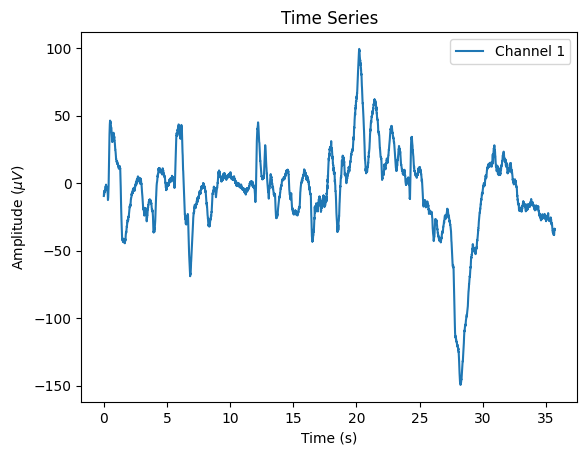

In [ ]:
ps.welch_power_spectrum(data,200)
ts.plot_time_series(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq)
